# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Please see the README.md file for information on how to install all the necessary packages for this project.

### Setup 1: Use the following cell for running on local computer

For instructions on how to install unityagents please see the README.md file.

In [1]:
#from unityagents import UnityEnvironment
#import numpy as np

#env = UnityEnvironment(file_name="Tennis.app")

### Setup 2: Use the following two cells for running on Udacity Workspace

The Udacity workspace is pre-configured so that the notebook will execute just fine.

In [2]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


In [3]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


### From here continue with all cells in the notebook

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The state for the second agent looks like:', states[1])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]
The state for the second agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.4669857  -1.5         0.          0.
 -6.83172083  6.          0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
for i in range(2):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

# Collaboration and Competition - Project Results

The following sections show my cresults from my work on this project.
In the first submission, my code was very similar to my solution of the second project, the Reacher environment with 20 agents.
In the second submissions, I follow more software engineering guidelines and have split the code into several independent files.
In both cases, the structure and basic algorithms were also discussed in the Udacity Coruse Lectures, such as the DDPG bipedal walker or the pendulum environments.

I have implemented an Actor-Critic set-up with a DDPG algorithm:

Implementation is pretty straight-forward and can be seen in the file **network.py**:

 - Actor neural network with three fully connected layers with sizes of: 24 (states) -> 256 (hidden) -> 128 (hidden) -> 2 (action value)
 - Critic neural network with three fully connected layers with sizes of: 24 (states) -> 256 (hidden) + 2 (action values) -> 128 (hidden) -> 1 (Q-value)
 - Please note that at the first hidden layer of the Critic network, the action values are merged

Both neural network architectures implement:

 - Linear fully connected layers: https://pytorch.org/docs/master/generated/torch.nn.Linear.html
 - Leaky rectangular linear unit activation function: https://pytorch.org/docs/stable/nn.html
 - Batch Normalization on input to regularize input data: https://pytorch.org/docs/master/generated/torch.nn.BatchNorm1d.html

I have implemented an agent in the file **agent.py** with:

 - Experience replay with random sampling (see file **replay_buffer.py**)
 - Ornstein-Uhlenbeck process for noise on action value (see file **noise_generator.py**)
 - Mean-squared-error loss functions
 - Adam optimizer: https://pytorch.org/docs/stable/_modules/torch/optim/adam.html#Adam
 - Several learning passes per step of agent
 
The final training is then executed by a Deep Deterministic Policy Gradient Algorithm (see file: **ddpg.py**).

Note that these implementations give room for many more advanced changes, which of some will be discussed in the final conclusions section.

I evolve the learning process until the mean score of the last 100 episodes reaches a value of greater than 0.5. Then the training process is stopped and the result are prepared for output and plotting.

### Setting of variables for the neural network, training algorithms and unity environments

The configuration class is given in this notebook, as to provide a good documentation of the hyperparameters for the report.

In [8]:
class Config:
    """Configuration class for this project."""
    
    def __init__(self, device):
        """Initialize constants and (hyper)parameters.
        Params
        ======
            See the list below for all network, agent and training parameters.
            For code execution of this project the parameter names are required to be unchanged.
            The values of the parameters can be changed and the parameter space explored.

            device (torch.device): String indicating if GPU or CPU is used
        """
        
        super(Config, self).__init__()
        
        self.buffer_size = int(1e6)     # replay buffer size
        self.batch_size = 256           # minibatch size
        self.gamma = 0.99               # discount factor
        self.tau = 0.0015               # for soft update of target parameters
        self.lr_actor = 0.0002          # learning rate for actor network
        self.lr_critic = 0.001          # learning rate for critic network

        self.fc_size = 32               # number of neurons in layer of neural network

        self.action_size = brain.vector_action_space_size # number of actions
        self.state_size = states.shape[1]    # number of states
        self.n_agents = len(env_info.agents) # number of agents

        self.n_episodes = 2000          # number of maximum episodes for training
        self.num_passes = 5             # Number of learning passes per step
        self.env_solved = 0.5           # average score of agent to consider environment solved
   
        self.seed_buffer = 27           # seed integer for random number of replay buffer
        self.seed_noise = 27            # seed integer for random number of noise process
        self.seed_actor = 27            # seed integer for random number of actor network
        self.seed_critic = 27           # seed integer for random number of critic network
        self.seed_agent = 27            # seed integer for random number of agent
        
        self.device = device            # Device for training (CPU or GPU)
        
        self.mu = 0.0                   # Mu of OUNoise process
        self.theta = 0.15               # Theta of OUNoise process
        self.sigma = 0.1                # Sigma of OUNoise process
        self.gauss_mu = 0.0             # Mean of noise distribution
        self.gauss_sigma = 1.0          # Standard deviation of noise distribution

### Check if training on GPU is possible, else use CPU

In [9]:
import torch

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # Training on CPU or GPU

if device == "cpu":
    print("Available: CPU only")
else:
    print("Available: GPU cuda")

Available: GPU cuda


### Initialize configuration

In [11]:
config = Config(device)

### Create instance agent for current run

In [12]:
from source.agent import ActorCritic
agent = ActorCritic(config)

### Main Loop

In the following cell the program is executed. The agent architecture is subsequently trained and the weights of the final solution as well as the time evolution of average reward are stored into files.

### Training of agent with deep deterministic policy gradient

Algorithm loops over a number of eposiodes with maximum of N_EPISODES=5000, each for a time until the ball has dropped onto the ground:

 - Every episode the current score and the average score (last 100 episodes) is print on console
 - Every 20 episodes the weights and scores are temporarily written into a file
 - The environment is considered solved if the average score (of all agents) is greater than 0.50 for the last 100 episodes
 - If the environment is solved, the training is stopped and the final weights are written in a file

In [13]:
# Import training algorithm
from source.ddpg import ddpg

# Import to keep notebook instance active while training 
import source.workspace_utils
from source.workspace_utils import active_session

In [14]:
print("\nTraining Loop:\n")

with active_session():
    scores, scores_avg = ddpg(agent, config, env)


Training Loop:

Episode 1	Current Score: 0.0000	Average Score: 0.0000
Episode 2	Current Score: 0.0000	Average Score: 0.0000
Episode 3	Current Score: 0.0000	Average Score: 0.0000
Episode 4	Current Score: 0.0000	Average Score: 0.0000
Episode 5	Current Score: 0.0000	Average Score: 0.0000
Episode 6	Current Score: 0.0000	Average Score: 0.0000
Episode 7	Current Score: 0.0000	Average Score: 0.0000
Episode 8	Current Score: 0.0000	Average Score: 0.0000
Episode 9	Current Score: 0.0000	Average Score: 0.0000
Episode 10	Current Score: 0.0000	Average Score: 0.0000
Episode 11	Current Score: 0.0000	Average Score: 0.0000
Episode 12	Current Score: 0.0000	Average Score: 0.0000
Episode 13	Current Score: 0.0000	Average Score: 0.0000
Episode 14	Current Score: 0.0000	Average Score: 0.0000
Episode 15	Current Score: 0.0000	Average Score: 0.0000
Episode 16	Current Score: 0.0000	Average Score: 0.0000
Episode 17	Current Score: 0.0000	Average Score: 0.0000
Episode 18	Current Score: 0.0000	Average Score: 0.0000
Ep

In [15]:
import pickle

In [16]:
f = open('output/scores.pckl', 'wb')
pickle.dump(scores, f)
f.close()

f = open('output/scores_avg.pckl', 'wb')
pickle.dump(scores_avg, f)
f.close()

In [17]:
f = open('output/scores.pckl', 'rb')
scores = pickle.load(f)
f.close()

f = open('output/scores_avg.pckl', 'rb')
scores_avg = pickle.load(f)
f.close()

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

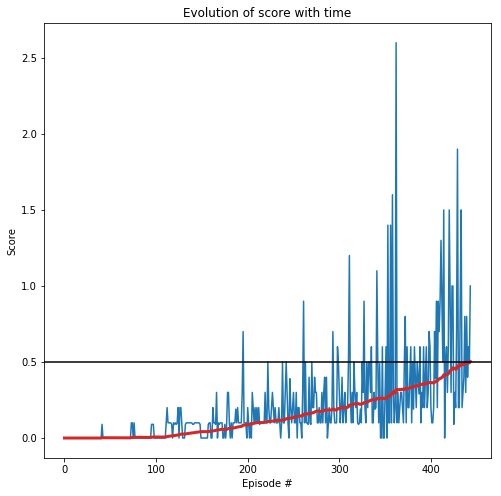

In [19]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, 'tab:blue')
plt.plot(np.arange(len(scores_avg)), scores_avg, 'tab:red', linewidth=3)

plt.axhline(y=0.5, color="Black")

plt.title('Evolution of score with time')
plt.xlabel('Episode #')
plt.ylabel('Score')
plt.show()

# Conclusions and future improvements

In this project I have implemented a DDPG algorithm to solve the Unity Tennis Environment with two playing agents.

The performance is as follows:

 - 444 episodes are required to solve the problem, when the average score of the last 100 episodes has reached 0.5.

After initially starting to solve the environment, with very high number of episodes, I have choosen to instead to implement a number of learning passes at each step of the agent. Therefore, even with smaller number of positive samples, the network can learn several time from it. I believe, that this is essential to speed up convergence, as otherwise more time is spent inside each episode playing.

Furthermore, I found otu that it is very helpful in traning if the agent makes some small positive samples by chance at the beginning (i.e. episodes of 0.1 reward), because otherwise the whole experience replay buffer is only filled with unsuccessful episodes.

Training is generally slower at later episodes, because the agents simply learn to play for longer time and keep the ball in the air for longer.

The environment was solved with a simple version of the Deep Deterministic Policy Gradient Algorithm. Also the architecture of the neural network contained a simple size of 128 to 256 neurons. I found during training that networks with larger numbers of neurons (i.e. > 1024) do not perform well at all in this task. The simpler the easier approach seems to work well.

In the future, it would very well be worthwhile to try some of the following improvements and algorithmic choices:

At first, it might be worthwhile to try the RainBow https://arxiv.org/abs/1710.02298 implementation of DeepMind, which combines even more improvements for Deep Reinforcement Learning. Also in my first project "navigation" I have used the prioritized experience replay (https://arxiv.org/abs/1511.05952) or hindsight experience replay (https://arxiv.org/abs/1707.01495) together with a weighted mean squared error loss functions.

Secondly, it is suggested to tryout the possible further possible algorithm. A good overview of these implementations is given by Shangtong Zhang: https://github.com/ShangtongZhang/DeepRL

Different agents: D4PG(https://arxiv.org/abs/1804.08617), PPO(https://arxiv.org/abs/1707.06347), TD3(https://arxiv.org/abs/1802.09477), SAC(https://arxiv.org/abs/1812.05905), PlanNet(https://ai.googleblog.com/2019/02/introducing-planet-deep-planning.html) and Dreamer(https://ai.googleblog.com/2020/03/introducing-dreamer-scalable.html).

Of course, at last, a complete study of exploration of the hyperparameter space is necessary, which would lead to some questions like this: How many layers perform best? How many neurons? Which activation functions? Linear or exponential epsilon decay? How to choose the discount factor for reward?